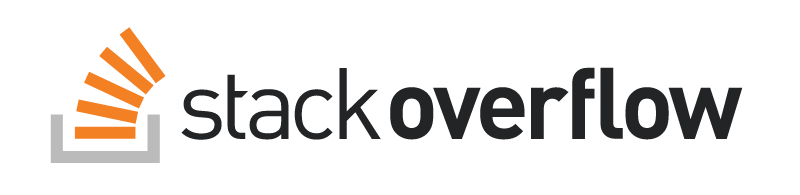

# Stack Overflow 2020 Developer Survey

## The Tasks:
1. How many developers participated in this survey?
2. Find the top 10 countries participating devs are from.
3. How many are from Nigeria?
4. What's the average age the Nigerian dev wrote their first code?
5. What's the average age of the Nigerian dev?
6. What are the kinds of employment they are in?
7. What's the gender distribution?
8. What majors did they study in school?
9. What languages have they worked with?
10. What's the average number of languages they have worked with?
11. What's the average number of years of experience of the Nigerian developer?


## Kickers:
1. How many devs are women, age below 25 and earn a living from dev?
2. What are the 10 most popular languages among Naija Devs?

**Ps: Minus gender, ignore missing values in columns in view.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df2 = pd.read_csv('survey_results_schema.csv')
df2.head(12)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [4]:
df.shape

(64461, 61)

In [5]:
df2.shape

(61, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
Column          61 non-null object
QuestionText    61 non-null object
dtypes: object(2)
memory usage: 1.1+ KB


In [8]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [9]:
df2.describe()

,Column,QuestionText
count,61,61
unique,61,52
top,DatabaseWorkedWith,"Which of the following describe you, if any? P..."
freq,1,3


In [10]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Respondent
False    64461
Name: Respondent, dtype: int64

MainBranch
False    64162
True       299
Name: MainBranch, dtype: int64

Hobbyist
False    64416
True        45
Name: Hobbyist, dtype: int64

Age
False    45446
True     19015
Name: Age, dtype: int64

Age1stCode
False    57900
True      6561
Name: Age1stCode, dtype: int64

CompFreq
False    40069
True     24392
Name: CompFreq, dtype: int64

CompTotal
False    34826
True     29635
Name: CompTotal, dtype: int64

ConvertedComp
False    34756
True     29705
Name: ConvertedComp, dtype: int64

Country
False    64072
True       389
Name: Country, dtype: int64

CurrencyDesc
False    45472
True     18989
Name: CurrencyDesc, dtype: int64

CurrencySymbol
False    45472
True     18989
Name: CurrencySymbol, dtype: int64

DatabaseDesireNextYear
False    44070
True     20391
Name: DatabaseDesireNextYear, dtype: int64

DatabaseWorkedWith
False    49537
True     14924
Name: DatabaseWorkedWith, dtype: int64

DevType
False    49370
True     15091


### 1. How many developers participated in this survey?

In [11]:
print('The number of Developers that participated in the survey is {}'.format(df['Respondent'].count()))

The number of Developers that participated in the survey is 64461


**Creating a function to make plotting easier**

In [12]:
def Plot_a_countplot(df,col,title):
    """
    Create a count plot from a value counts 
    (first ten entires) on the column specified
    
    Args: 
        df= Dataframe
        col= name of the column in the dataframe
        title = desired title of the plot
    Return:
        A count plot
    """
    plt.figure(figsize=(7,7))
    data = df[col].value_counts().head(10)
    ax = sns.countplot(y=df[col],
                  order=data.index,
                  lw=1,
                  palette='viridis',
                  edgecolor='k'*df[col].nunique()
                  )
    for x,y in enumerate(data):
        ax.text(1.9,x,y,weight='bold',color='white',fontsize=12,bbox=dict(facecolor='black', alpha=0.7))
    plt.title(title,fontsize=16)

### 2. Find the top 10 countries participating devs are from.

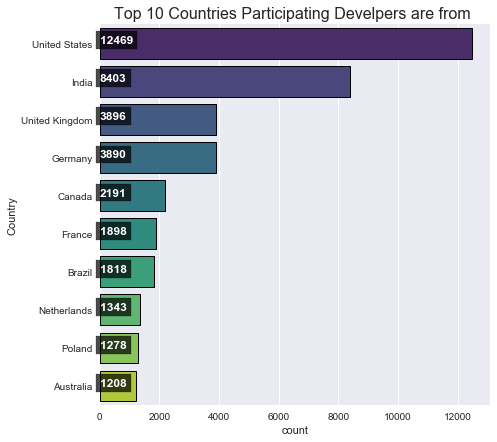

In [13]:
Plot_a_countplot(df, 'Country', 'Top 10 Countries Participating Develpers are from ')

**Created a new dataframe for devs from Nigeria**

In [14]:
nigeria_devs = df[df['Country']=='Nigeria']

### 3. How many are from Nigeria?

In [15]:
print('The number of Developers from Nigeria that participated in the survey is {}'.format(len(nigeria_devs['MainBranch'])))

The number of Developers from Nigeria that participated in the survey is 593


### 4. What's the average age the Nigerian dev wrote thier first code?

In [16]:
nigeria_devs['Age1stCode'] = pd.to_numeric(nigeria_devs['Age1stCode'])

In [17]:
print('The Average Age the Nigerian Developer wrote his/her first code is {}'.format(int(np.mean(nigeria_devs['Age1stCode']))))

The Average Age the Nigerian Developer wrote his/her first code is 19


### 5. What's the average age of the Nigerian dev?

In [18]:
print('The Average Age of the Nigerian Developer is {}'.format(int(np.mean(nigeria_devs['Age']))))

The Average Age of the Nigerian Developer is 25


### 6. What are the kinds of employment they are in?

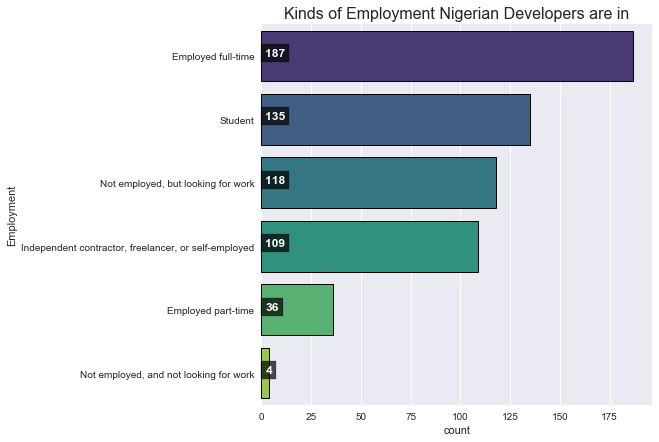

In [19]:
Plot_a_countplot(nigeria_devs,'Employment','Kinds of Employment Nigerian Developers are in')

### 7. What's the gender distribution?

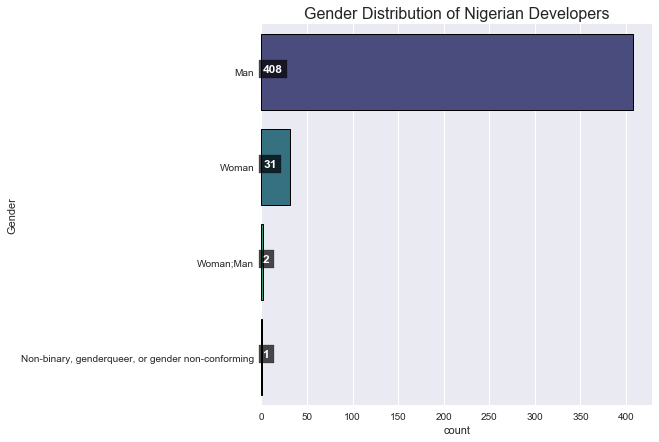

In [20]:
Plot_a_countplot(nigeria_devs, 'Gender','Gender Distribution of Nigerian Developers')

###  8. Whats majors did they study in school?

In [21]:
nigeria_devs.replace(np.nan, 'No response', inplace=True)

In [22]:
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('Fine'), ['UndergradMajor']] = 'Fine Arts'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('computer'), ['UndergradMajor']] = 'Computer Science'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('engineering'), ['UndergradMajor']] = 'Engineering Discipline'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('natural'), ['UndergradMajor']] = 'Natural Science'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('Infor'), ['UndergradMajor']] = 'Information Systems/Tech'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('business'), ['UndergradMajor']] = 'Business Discipline'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('health'), ['UndergradMajor']] = 'Health Science'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('social'), ['UndergradMajor']] = 'Social Science'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('human'), ['UndergradMajor']] = 'Humanities Discipline'
nigeria_devs.loc[nigeria_devs['UndergradMajor'].str.contains('Web'), ['UndergradMajor']] = 'Web Development or Design'

In [23]:
nigeria_devs['UndergradMajor'].value_counts()

No response                  200
Computer Science             192
Engineering Discipline        62
Natural Science               32
Mathematics or statistics     24
Information Systems/Tech      23
Business Discipline           18
Health Science                10
Humanities Discipline          9
Social Science                 9
Web Development or Design      8
Fine Arts                      3
I never declared a major       3
Name: UndergradMajor, dtype: int64

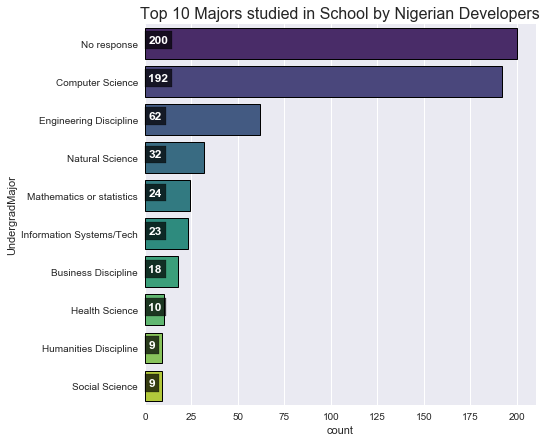

In [24]:
Plot_a_countplot(nigeria_devs, 'UndergradMajor','Top 10 Majors studied in School by Nigerian Developers')

**Please Note: "NO response" is not a Major. It simply means the participants didn't input any programming language**

### 9. What languages have they worked with?

In [25]:
language = {line for line in nigeria_devs['LanguageWorkedWith'] for line in line.split(';')}
language 

{'Assembly',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'Dart',
 'Go',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Kotlin',
 'No response',
 'Objective-C',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VBA'}

**Please note, "No response" is not a programming language. It simply means the participants didn't input any programming language**

### 10. What's the average number of languages they have worked with?

In [26]:
languages = []
for line in nigeria_devs['LanguageWorkedWith'].str.split(';'):
        languages.append(len(line))
languages = pd.DataFrame(languages,columns=['Languages'])
print('The Average number of languages the Nigerian Developer have worked with is {}'\
      .format(round(np.mean(languages['Languages']))))

The Average number of languages the Nigerian Developer have worked with is 4


### 11. What's the average number of years of experience of the Nigerian developer?

In order to calculate the average years of experience of the Nigerian Developers, I had to change some things. 

1. I changed the **less than 1 year** entry to an interger 1 (i.e 1 year of experience).
2. I changed the **No response** entry to interger 0 (i.e no experience)

In [27]:
nigeria_devs['YearsCode'].replace('Less than 1 year', 1, inplace=True)
nigeria_devs['YearsCode'].replace('No response', 0, inplace=True)

In [28]:
nigeria_devs['YearsCode'] = pd.to_numeric(nigeria_devs['YearsCode'])
print('The Average number of years of experience of the Nigerian developer is {}'\
      .format(np.mean(nigeria_devs['YearsCode'])))

The Average number of years of experience of the Nigerian developer is 4.627318718381113


# Kickers

### 1. How many devs are women, age below 25 and earn a living from dev?

In [29]:
kicker1 = len(df[(df['Gender']=='Woman') & (df['Age'] < 25) & (df['CompTotal']> 0.0)])
print('{} Women are below the age of 25 and they also earn a living as a Developer'.format(kicker1))

342 Women are below the age of 25 and they also earn a living as a Developer


### 2. What are the 10 most popular languages among Naija Devs?

In [30]:
languages_devs = [line for line in nigeria_devs['LanguageWorkedWith'] for line in line.split(';')]
kicker2 = pd.DataFrame(languages_devs,columns=['Languages'])

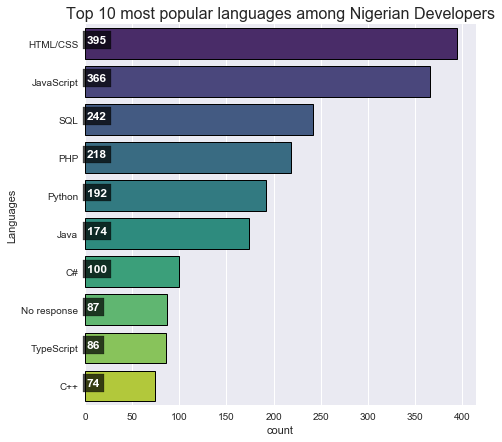

In [31]:
Plot_a_countplot(kicker2, 'Languages','Top 10 most popular languages among Nigerian Developers')

### Adebo Dolapo